# <b>取得股價資料</b>

## 使用 Yahoo Finance 取得資料

In [1]:
!pip install yfinance

In [2]:
import yfinance as yf # yahoo finance 套件
import pandas as pd # 結構化資料處理套件
import datetime as dt # 時間套件

In [3]:
# 輸入股票代號
stock_id = "2317.tw"
# stock_id = "2357.tw"
# stock_id = "AAPL"
# stock_id = "NVDA"

'''今天往前算幾天'''
# 資料結束時間
end = dt.date.today()
# 抓取半年資料（現在-過去180天）
start = end - dt.timedelta(days=360)

'''抓取特定時間'''
# start = dt.datetime(2025, 6, 1)  # 指定的開始日期
# end = dt.datetime(2025, 8, 31)    # 指定的結束日期


# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間
df = yf.download(stock_id, start=start, end=end).reset_index()

# 刪除 Ticker 欄位並取代
df.columns = df.columns.droplevel('Ticker')

df

/tmp/ipython-input-1546294933.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock_id, start=start, end=end).reset_index()
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
0,2024-09-30,180.929031,184.306373,180.929031,183.341418,61700675
1,2024-10-01,180.446548,183.341413,178.999116,182.376458,33579126
2,2024-10-04,187.201233,189.613620,181.411504,181.411504,114048146
3,2024-10-07,190.578568,192.026000,188.166181,192.026000,83512089
4,2024-10-08,187.201233,190.578575,187.201233,190.096097,53834729
...,...,...,...,...,...,...
233,2025-09-16,215.500000,217.000000,213.500000,217.000000,49662786
234,2025-09-17,212.000000,214.500000,211.000000,214.000000,55894730
235,2025-09-18,215.000000,216.000000,208.000000,211.500000,78891977
236,2025-09-19,214.000000,217.000000,214.000000,216.500000,56361409


# <b>1. 技術指標的計算</b>
移動動平均線（MA）、相對強弱指數（RSI）、平滑異同移動平均線（MACD）


## 1.1 計算簡單移動平均線（SMA）

In [4]:
# 計算5日 SMA
df['5_SMA'] = df['Close'].rolling(window=8).mean()

# 計算10日 SMA
df['10_SMA'] = df['Close'].rolling(window=13).mean()

# 計算15日 SMA
df['15_SMA'] = df['Close'].rolling(window=20).mean()

# 列印最後筆數
df.tail()

Price,Date,Close,High,Low,Open,Volume,5_SMA,10_SMA,15_SMA
233,2025-09-16,215.5,217.0,213.5,217.0,49662786,211.1875,207.192308,206.650
234,2025-09-17,212.0,214.5,211.0,214.0,55894730,212.0625,207.846154,207.225
235,2025-09-18,215.0,216.0,208.0,211.5,78891977,213.5000,209.115385,207.675
236,2025-09-19,214.0,217.0,214.0,216.5,56361409,214.3125,210.307692,208.250
237,2025-09-22,216.0,218.0,214.0,215.5,33805955,215.0625,211.500000,208.675


## 1.2 計算相對強弱指數（RSI）

<img src="https://images.stockfeel.com.tw/stockfeelimage/2015/10/%E6%95%99%E4%BD%A0%E7%9C%8B%E6%87%82-RSI-%E7%9B%B8%E5%B0%8D%E5%BC%B7%E5%BC%B1%E6%8C%87%E6%A8%99-01.jpg" alt="rsi" width="500"/>

<img src="https://images.stockfeel.com.tw/stockfeelimage/2015/10/%E6%95%99%E4%BD%A0%E7%9C%8B%E6%87%82-RSI-%E7%9B%B8%E5%B0%8D%E5%BC%B7%E5%BC%B1%E6%8C%87%E6%A8%99-02.jpg" alt="rs" width="500"/>

In [5]:
# 計算每個交易日的價格變動，即當天收盤價與前一天收盤價的差異
df['Change'] = df['Close'] - df['Close'].shift(1)

# 將變動值中的正數部分視為“Gain”（增益），如果變動為負則記為0
df['Gain'] = df['Change'].apply(lambda x: x if x > 0 else 0)

# 將變動值中的負數部分視為“Loss”（損失），取其絕對值，如果變動為正則記為0
df['Loss'] = df['Change'].apply(lambda x: abs(x) if x < 0 else 0)

df.tail()

# 計算過去10個交易日的平均增益
df['Avg Gain'] = df['Gain'].rolling(window=10).mean()

# 計算過去10個交易日的平均損失
df['Avg Loss'] = df['Loss'].rolling(window=10).mean()

# 計算相對強弱指數的相對強度（RS），即平均增益與平均損失的比值
df['RS'] = df['Avg Gain'] / df['Avg Loss']

# 計算相對強弱指數（RSI），使用RS公式計算出來
df['RSI'] = 100 - (100 / (1 + df['RS']))

# 顯示最後幾行的數據
df.tail()

Price,Date,Close,High,Low,Open,Volume,5_SMA,10_SMA,15_SMA,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI
233,2025-09-16,215.5,217.0,213.5,217.0,49662786,211.1875,207.192308,206.650,-0.5,0.0,0.5,2.05,0.35,5.857143,85.416667
234,2025-09-17,212.0,214.5,211.0,214.0,55894730,212.0625,207.846154,207.225,-3.5,0.0,3.5,1.85,0.70,2.642857,72.549020
235,2025-09-18,215.0,216.0,208.0,211.5,78891977,213.5000,209.115385,207.675,3.0,3.0,0.0,1.90,0.70,2.714286,73.076923
236,2025-09-19,214.0,217.0,214.0,216.5,56361409,214.3125,210.307692,208.250,-1.0,0.0,1.0,1.70,0.80,2.125000,68.000000
237,2025-09-22,216.0,218.0,214.0,215.5,33805955,215.0625,211.500000,208.675,2.0,2.0,0.0,1.90,0.65,2.923077,74.509804


## 1.3 計算平滑異同移動平均線（MACD）

In [7]:
'''
第一日
# 平滑係數公式： α = 2 / (span + 1) = 2 / (span + 1)
# α = 2 / (8 + 1) = 2 / (8 + 1) ≈ 0.2222
# 0.2222 * 770.0 + (1-0.2222) * 776.0 = 171.094 + 603.5728 = 774.6668
'''

# 計算5天的指數移動平均線（EMA），並將其存儲在 'EMA_5' 列中
# adjust=False 表示在計算 EMA 時，只考慮當前值和前一個 EMA 的遞歸計算方式，而不考慮所有歷史數據
df['EMA_5'] = df['Close'].ewm(span=5, adjust=False).mean()

# 計算10天的指數移動平均線（EMA），並將其存儲在 'EMA_10' 列中
df['EMA_10'] = df['Close'].ewm(span=10, adjust=False).mean()

# 計算MACD線：5天EMA減去10天EMA，並將其存儲在 'MACD' 列中
df['MACD'] = df['EMA_5'] - df['EMA_10']

# 顯示DataFrame的最後幾行數據
df.head(3)

Price,Date,Close,High,Low,Open,Volume,5_SMA,10_SMA,15_SMA,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI,EMA_5,EMA_10,MACD
0,2024-09-30,180.929031,184.306373,180.929031,183.341418,61700675,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,180.929031,180.929031,0.000000
1,2024-10-01,180.446548,183.341413,178.999116,182.376458,33579126,NaN,NaN,NaN,-0.482483,0.000000,0.482483,NaN,NaN,NaN,NaN,180.768204,180.841307,-0.073103
2,2024-10-04,187.201233,189.613620,181.411504,181.411504,114048146,NaN,NaN,NaN,6.754684,6.754684,0.000000,NaN,NaN,NaN,NaN,182.912547,181.997657,0.914889


# <b>2. 資料可視化</b>
K 線型態的捕捉

## 2.1 可視化收盤價折線圖

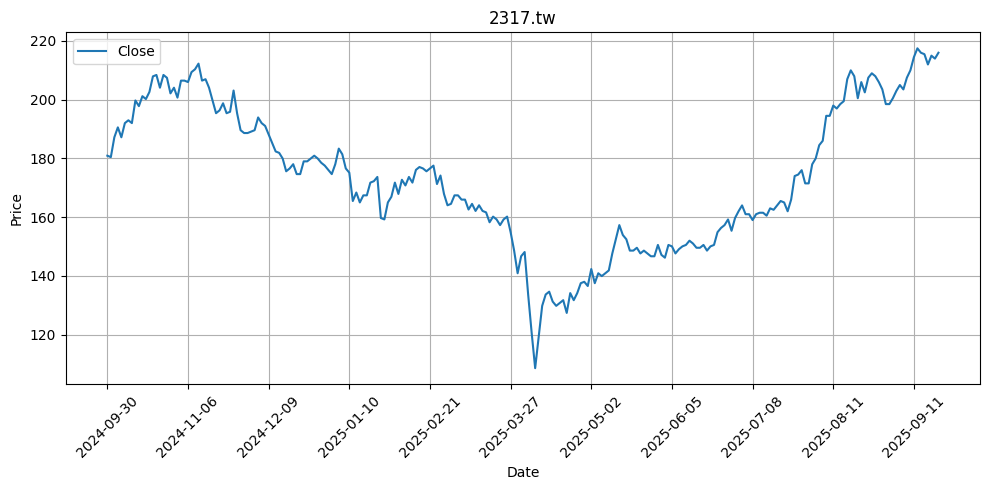

In [8]:
import matplotlib.pyplot as plt

# 畫布尺寸大小設定
plt.figure(figsize=(10, 5))

# 設定要繪製的資料欄位
plt.plot(df['Close'], label='Close')

# 設定 x 軸的時間
num = 10
date = df["Date"].dt.strftime('%Y-%m-%d')
plt.xticks(date[::len(date)//num].index,  # 設定在 x 軸上顯示標籤的位置（索引），這些位置間隔為 len(date)//num
           date[::len(date)//num],  # 設定顯示在 x 軸上的日期標籤，數量為 num，間隔為 len(date)//num
           rotation = 45) # 讓日期標籤旋轉 45 度，以避免標籤之間重疊，提高可讀性

# 設定圖表的標題，x 軸和 y 軸的標籤
plt.title(f'{stock_id}')   # 將股票代號設為圖標
plt.xlabel('Date')         # x 軸標籤
plt.ylabel('Price')  # y 軸標籤
plt.legend(loc='upper left') # 在左上角顯示圖例
plt.grid(True) # 在圖上顯示網格
plt.tight_layout()  # 自動調整圖表中的間距，避免元素之間的重疊

# 顯示圖表
plt.show()

## 2.2 加入技術指標

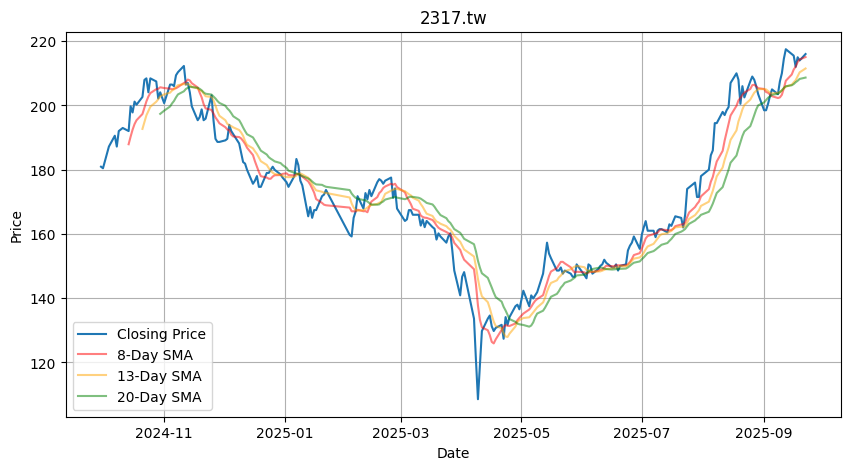

In [11]:
# 畫布尺寸大小設定
plt.figure(figsize=(10, 5))

# 設定要繪製的資料欄位
plt.plot(df['Date'], df['Close'], label='Closing Price')

# 5 天的 SMA
plt.plot(df['Date'], df['5_SMA'], label='8-Day SMA', color='red', alpha=.5)

# 10 天的 SMA
plt.plot(df['Date'], df['10_SMA'], label='13-Day SMA', color='orange', alpha=.5)

# 15 天的 SMA
plt.plot(df['Date'], df['15_SMA'], label='20-Day SMA', color='green', alpha=.5)

# 將股票代號設為圖標
plt.title(f'{stock_id}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

## 2.3 K 線

In [12]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.4 MB/s eta 0:00:00


In [13]:
# 將原始的 dataframe 再建立一個出來
kplot_df = df.set_index('Date')
kplot_df['2025-08-01':'2025-09-17'].tail()

Price,Close,High,Low,Open,Volume,5_SMA,10_SMA,15_SMA,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI,EMA_5,EMA_10,MACD
Date,,,,,,,,,,,,,,,,,,
2025-09-11,214.5,216.5,209.0,212.0,129973733,205.3125,205.192308,205.450,4.5,4.5,0.0,1.75,0.90,1.944444,66.037736,209.083605,206.611129,2.472477
2025-09-12,217.5,218.5,216.5,217.0,71479522,207.6875,205.846154,205.975,3.0,3.0,0.0,2.05,0.65,3.153846,75.925926,211.889070,208.590923,3.298147
2025-09-15,216.0,218.5,213.0,218.5,55330938,209.6250,206.461538,206.275,-1.5,0.0,1.5,2.05,0.30,6.833333,87.234043,213.259380,209.938028,3.321352
2025-09-16,215.5,217.0,213.5,217.0,49662786,211.1875,207.192308,206.650,-0.5,0.0,0.5,2.05,0.35,5.857143,85.416667,214.006253,210.949296,3.056958
2025-09-17,212.0,214.5,211.0,214.0,55894730,212.0625,207.846154,207.225,-3.5,0.0,3.5,1.85,0.70,2.642857,72.549020,213.337502,211.140333,2.197169


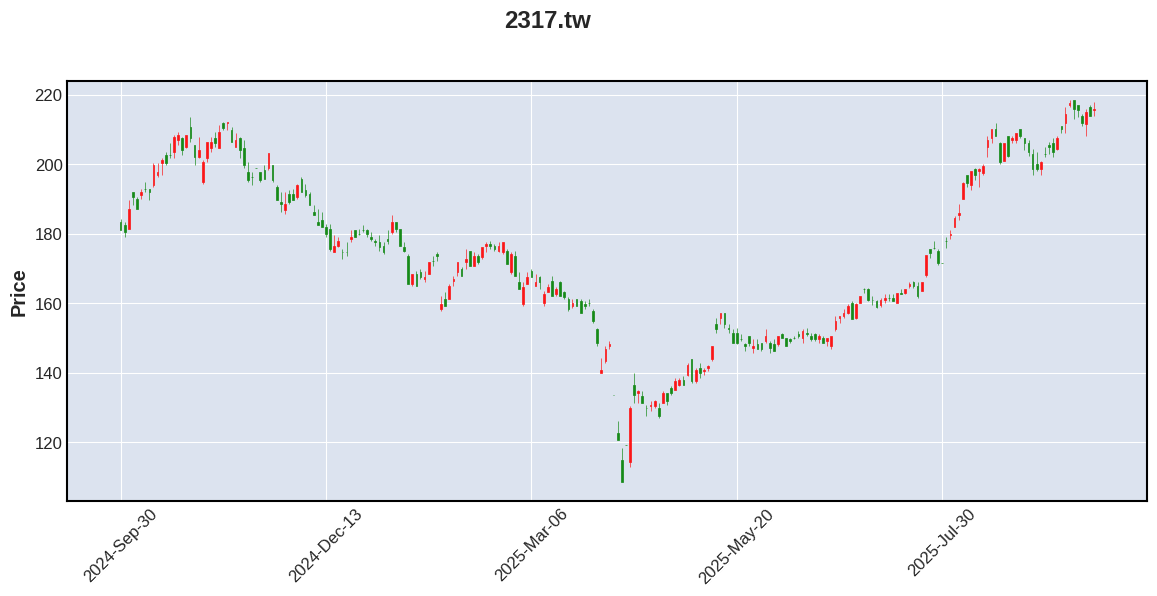

In [14]:
import mplfinance as mpf
# 設置繪圖風格
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='default',
                marketcolors=my_color)

# 使用 mplfinance 繪製 K 線圖
mpf.plot(kplot_df, type='candle', style=my_style, title=f'{stock_id}', figsize=(15, 6))

## 2.4 捕捉 Hammer 型態

錘形線（Hammer）

<img src="https://drive.google.com/uc?id=1M5t0g5kKCm2xfzRaFHfKt_CT41XSRjgb" alt="drawing" width="600"/>

In [15]:
# 計算 K 線長度 = abs(收盤-開盤)
df['body_length'] = abs(df['Close'] - df['Open'])

# 計算下影線長度 = abs(最高-最小)
df['lower_shadow'] = abs(df['Low'] - df[['Open', 'Close']].min(axis=1))

# 計算上影線長度 = abs(最高-最小)
df['upper_shadow'] = abs(df['High'] - df[['Open', 'Close']].max(axis=1))

#print('df',df)
# 定義 Hammer 型態的條件
hammer_condition = (
    (df['lower_shadow'] > 2 * df['body_length']) &  # 下影線長於實體的两倍
    (df['upper_shadow'] < df['body_length'] * 0.1) &  # 上影線很短
    (df['body_length'] < (df['High'] - df['Low']) * 0.4)  # 實體相對較小
)

# 提取 Hammer 型態
hammer_df = df[hammer_condition]
hammer_df.set_index('Date', inplace=True)

hammer_df

Price,Close,High,Low,Open,Volume,5_SMA,10_SMA,15_SMA,Change,Gain,...,Avg Gain,Avg Loss,RS,RSI,EMA_5,EMA_10,MACD,body_length,lower_shadow,upper_shadow
Date,,,,,,,,,,,,,,,,,,,,,
2024-10-14,192.026001,192.990956,189.613614,192.990956,36211894,187.924946,NaN,NaN,-0.964951,0.000000,...,NaN,NaN,NaN,NaN,190.468484,187.894277,2.574207,0.964955,2.412387,0.0
2024-11-11,212.290054,212.290054,209.877667,211.807577,41304740,206.982801,206.648780,204.401548,1.929916,1.929916,...,1.399182,1.013200,1.380953,58.000011,209.390313,207.294592,2.095720,0.482477,1.929910,0.0
2025-06-25,156.322678,156.322678,154.392768,155.840200,48074338,151.256664,150.978311,150.074594,1.447433,1.447433,...,1.013202,0.434229,2.333338,70.000042,153.209041,151.799154,1.409887,0.482477,1.447432,0.0


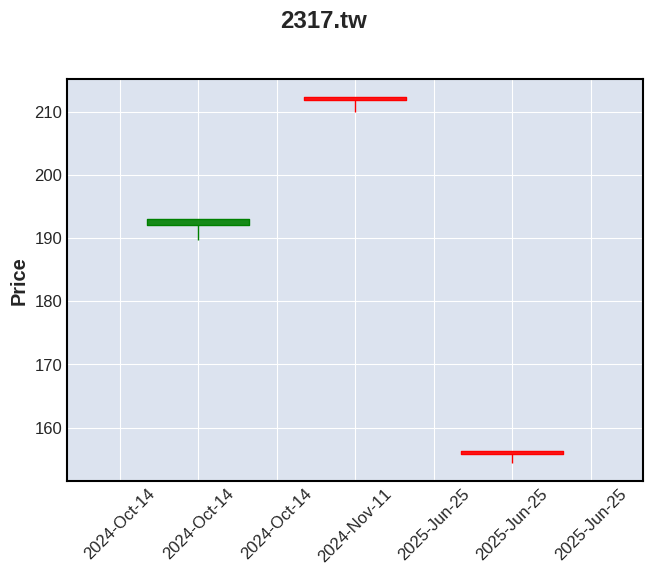

In [16]:
mpf.plot(hammer_df, type='candle', style=my_style, title=f'{stock_id}')

## 2.5 捕捉 Doji 型態

十字線（Doji）

<img src="https://drive.google.com/uc?id=1BDfcn8ZmMVgl0Xlku7mSD338WHeffrgc" alt="drawing" width="600"/>

In [17]:
# 計算 K 線長度
df['body_length'] = abs(df['Close'] - df['Open'])

# 定義Doji型態的條件
# 一般來說，body 長度 如果 小於等於 (最高價-最低價) * 0.1
doji_condition = (
    df['body_length'] <= (df['High'] - df['Low']) * 0.1  # 中間區域非常小
)

# 提取Doji形态
doji_df = df[doji_condition]
doji_df.set_index('Date', inplace=True)

doji_df

Price,Close,High,Low,Open,Volume,5_SMA,10_SMA,15_SMA,Change,Gain,...,Avg Gain,Avg Loss,RS,RSI,EMA_5,EMA_10,MACD,body_length,lower_shadow,upper_shadow
Date,,,,,,,,,,,,,,,,,,,,,
2024-10-11,192.990952,194.920861,192.025997,192.990952,69936130,NaN,NaN,NaN,0.964951,0.964951,...,NaN,NaN,NaN,NaN,189.689726,186.976116,2.713609,0.000000,0.964955,1.929910
2024-10-21,202.640503,206.017845,201.675548,202.640503,58640655,197.333252,192.694048,NaN,2.412384,2.412384,...,2.267641,0.723714,3.133340,75.806488,199.619955,195.982460,3.637494,0.000000,0.964955,3.377342
2024-11-19,196.368301,197.815734,193.955914,196.368301,59058419,203.967318,204.681756,205.173512,0.964951,0.964951,...,0.771964,1.785165,0.432432,30.188681,199.703519,202.222561,-2.519042,0.000000,2.412387,1.447432
2024-11-20,198.780685,198.780685,198.780685,198.780685,44351353,202.519886,204.533301,204.715159,2.412384,2.412384,...,1.013202,1.736919,0.583333,36.842091,199.395907,201.596765,-2.200858,0.000000,0.000000,0.000000
2024-11-28,188.648666,192.026008,186.236279,189.131144,56842531,195.403347,198.149756,201.386065,-0.964951,0.000000,...,1.109697,2.653624,0.418182,29.487173,193.009895,195.979930,-2.970035,0.482477,2.412387,2.894864
2024-12-19,174.656815,175.621769,172.726905,174.656815,62303203,179.300661,183.786774,186.984115,-3.377350,0.000000,...,0.241240,1.978159,0.121952,10.869609,177.502493,180.736341,-3.233848,0.000000,1.929910,0.964955
2024-12-20,174.656815,177.551679,173.691860,174.656815,55158347,177.973848,182.636250,185.922665,0.000000,0.000000,...,0.241240,1.881664,0.128206,11.363679,176.553933,179.630972,-3.077039,0.000000,0.964955,2.894864
2024-12-25,179.964066,181.411498,179.481588,179.964066,21198608,177.189823,179.630045,183.413782,0.964951,0.964951,...,0.771965,1.013203,0.761905,43.243259,178.596267,179.520634,-0.924367,0.000000,0.482477,1.447432
2024-12-26,180.929031,182.376464,180.446554,180.929031,35581123,177.853231,179.073341,183.027800,0.964966,0.964966,...,0.868462,0.964957,0.900001,47.368439,179.373855,179.776706,-0.402851,0.000000,0.482477,1.447432


In [18]:
doji_df.index

DatetimeIndex(['2024-10-11', '2024-10-21', '2024-11-19', '2024-11-20',
               '2024-11-28', '2024-12-19', '2024-12-20', '2024-12-25',
               '2024-12-26', '2025-01-21', '2025-03-26', '2025-04-07',
               '2025-04-10', '2025-04-17', '2025-05-21', '2025-06-10',
               '2025-07-03', '2025-07-07', '2025-07-11', '2025-07-28',
               '2025-07-30', '2025-07-31', '2025-08-13', '2025-09-04'],
              dtype='datetime64[ns]', name='Date', freq=None)

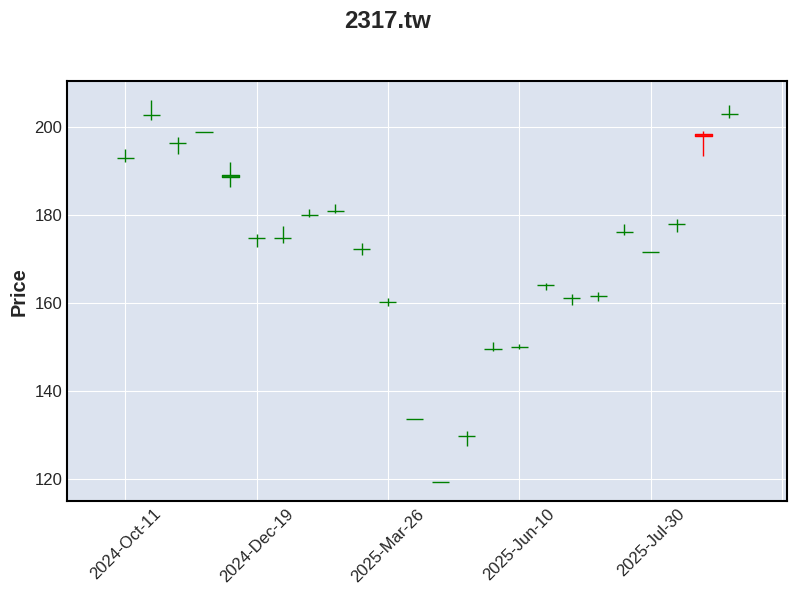

In [19]:
mpf.plot(doji_df, type='candle', style=my_style, title=f'{stock_id}', figsize=(10, 6))

# <b>3. 機器學習預測股價漲跌</b>
技術指標當特徵，用線性回歸、決策樹、隨機森林預測股價漲跌

## 3.1 資料前處理

In [20]:
import numpy as np  # 引入 numpy，用於數據處理和數值運算
from sklearn.model_selection import train_test_split  # 引入 train_test_split，用於將數據集拆分為訓練集和測試集
from sklearn.metrics import mean_squared_error  # 引入 mean_squared_error 用於評估模型性能

In [22]:
# 標籤: 預測未來1天的價格，舉例說明:用技術指標預測隔天的收盤價
n = 1
df['Future_Price'] = df['Close'].shift(-n)

# 去除缺失值
df.dropna(inplace=True)

# 使用特徵
X = df[['15_SMA', 'RSI', 'MACD']]

# 標籤（未來價格）
y = df['Future_Price']

X.shape, y.shape

((217, 3), (217,))

In [23]:
# 將數據集 X 和標籤 y 拆分為訓練集和測試集
# test_size=0.2 表示測試集佔全部數據的 20% --> 80% 的資料作為訓練，20% 的資料作為測試
# shuffle=False 表示在拆分數據時不打亂原始數據的順序
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 查看拆分後訓練集和測試集的形狀
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((173, 3), (44, 3), (173,), (44,))

## 3.2 線性回歸（Linear Regression）

In [24]:
# 引入線性回歸模型
from sklearn.linear_model import LinearRegression

# 建立並訓練線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"線性回歸模型RMSE: {rmse:.2f}")

# 使用模型進行未來價格走勢預測
future_pred = model.predict(X[-1:])  # 使用最新的數據進行預測
print(f"線性回歸模型預測未來{n}天的價格: {future_pred[0]:.2f}")

線性回歸模型RMSE: 4.30
線性回歸模型預測未來1天的價格: 214.75


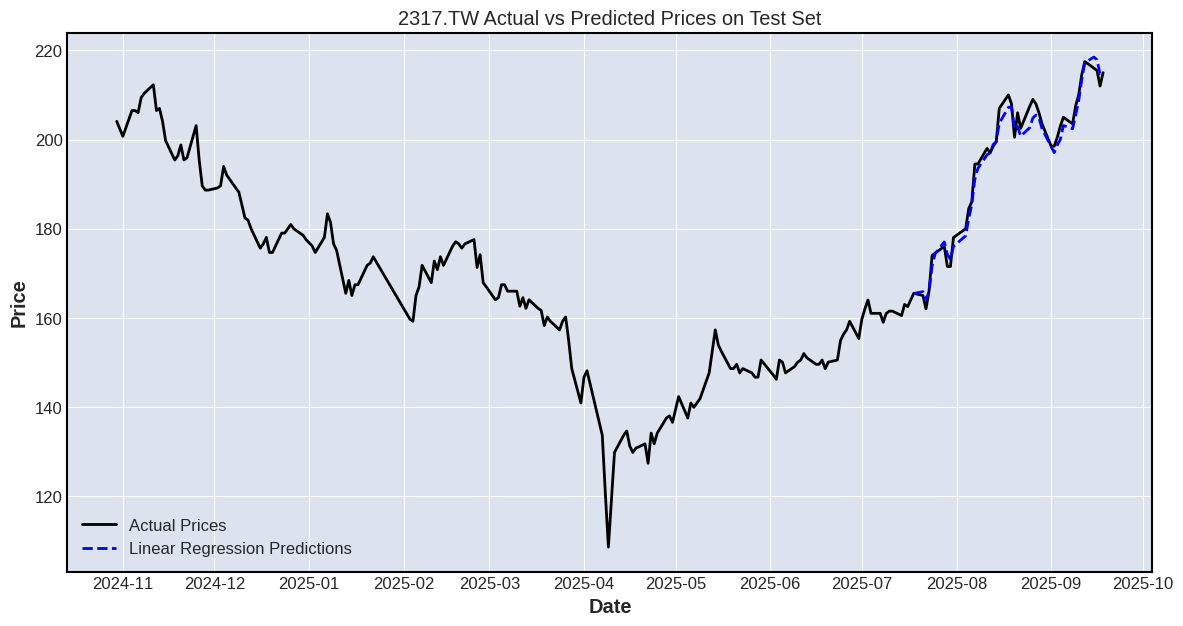

In [25]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Linear Regression Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2317.TW Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

## 3.2 決策樹（Decision Tree）

In [26]:
from sklearn.tree import DecisionTreeRegressor

# 建立並訓練決策數模型
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"決策樹模型RMSE: {rmse:.2f}")

future_pred = model.predict(X[-1:])
print(f"決策樹模型預測未來{n}天的價格: {future_pred[0]:.2f}")

決策樹模型RMSE: 16.02
決策樹模型預測未來1天的價格: 212.29


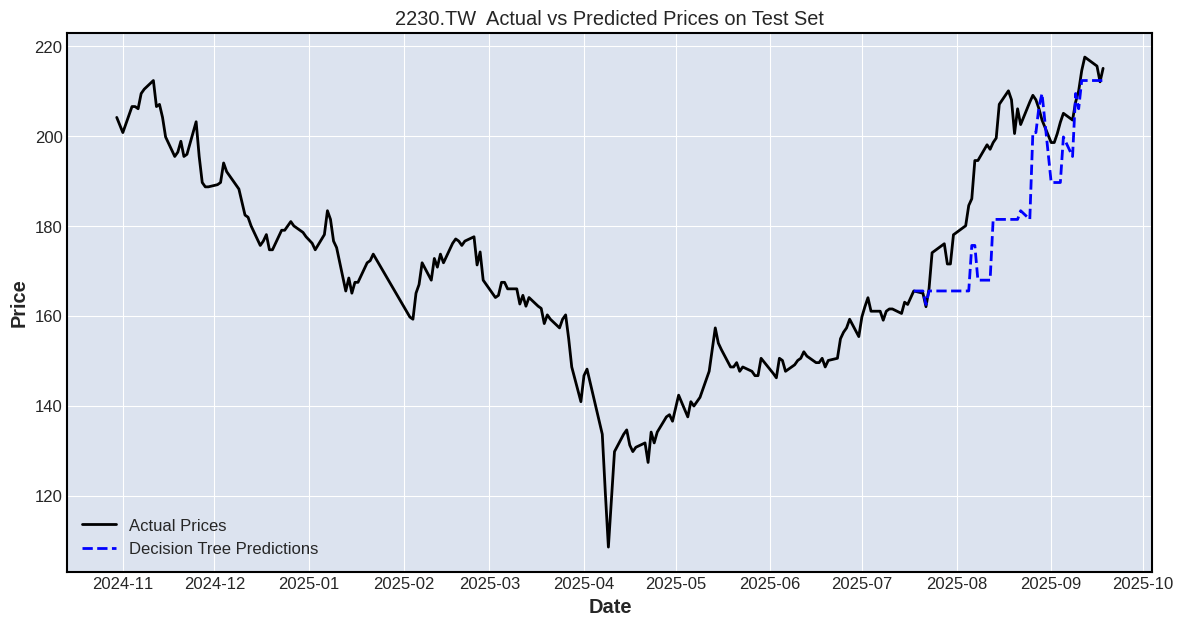

In [27]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Decision Tree Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2230.TW  Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

## 3.3 隨機森林（Random Forest）

In [28]:
# 引入隨機森林模型
from sklearn.ensemble import RandomForestRegressor

# 建立並訓練決策數模型
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"隨機森林模型RMSE: {rmse:.2f}")

future_pred = model.predict(X[-1:])
print(f"隨機森林模型預測未來{n}天的價格: {future_pred[0]:.2f}")

隨機森林模型RMSE: 15.89
隨機森林模型預測未來1天的價格: 207.86


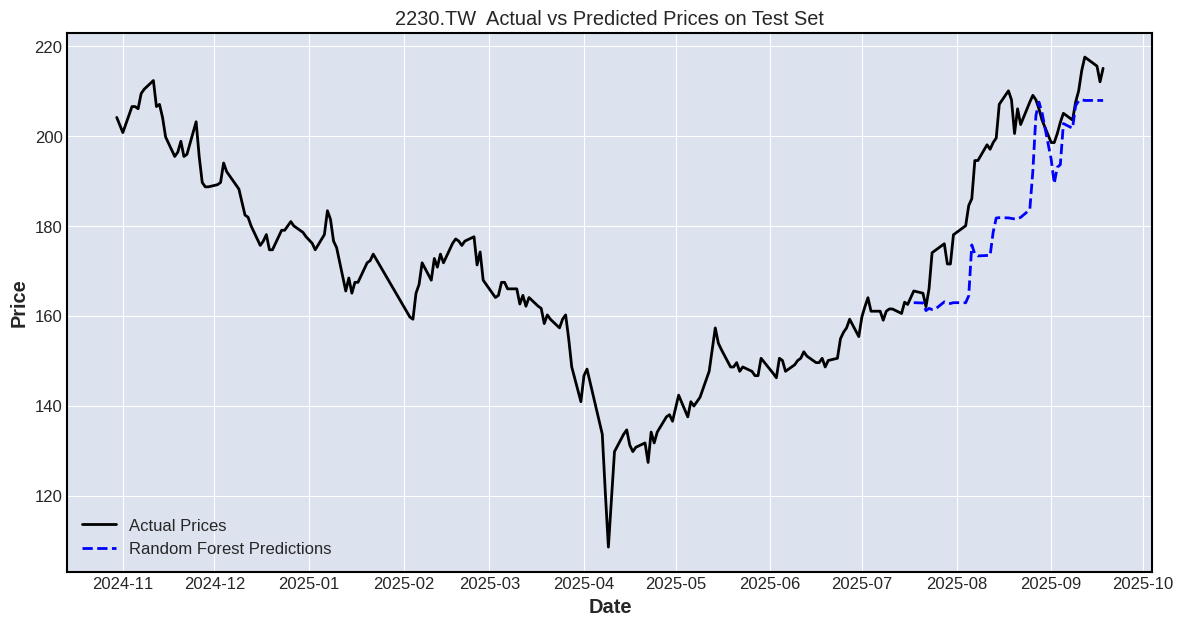

In [29]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Random Forest Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2230.TW  Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

# 補充：在 Colab 上使用中文字體

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

# 改style要在改font之前
# plt.style.use('seaborn')

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2025-09-23 09:32:00--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.253.62.138, 172.253.62.139, 172.253.62.102, ...
Connecting to drive.google.com (drive.google.com)|172.253.62.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-09-23 09:32:00--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.63.132, 2607:f8b0:4004:c08::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.63.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  95.1MB/s    in 0.2s    

2025-09-23 09:32:

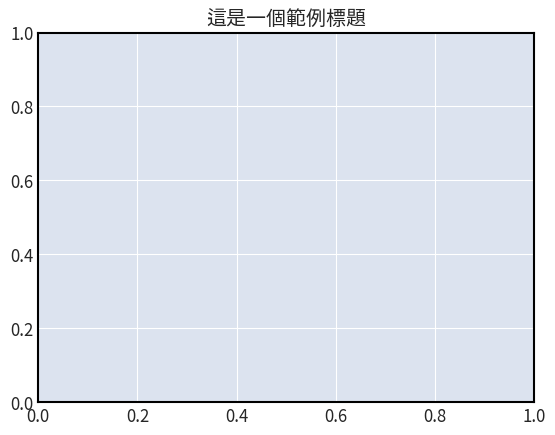

In [ ]:
# 繪製範例圖表
plt.title("這是一個範例標題")
plt.show()

# Pandas Shift

In [ ]:
temp_df = pd.DataFrame({
    'Date': ['2024-10-11', '2024-10-12', '2024-10-13', '2024-10-14', '2024-10-15', '2024-10-16'],
    'Close': [111, 222, 333, 444, 555, 666]
})
temp_df

,Date,Close
0,2024-10-11,111
1,2024-10-12,222
2,2024-10-13,333
3,2024-10-14,444
4,2024-10-15,555
5,2024-10-16,666


In [ ]:
temp_df['Future'] = temp_df['Close'].shift(-1)
temp_df

,Date,Close,Future
0,2024-10-11,111,222.0
1,2024-10-12,222,333.0
2,2024-10-13,333,444.0
3,2024-10-14,444,555.0
4,2024-10-15,555,666.0
5,2024-10-16,666,NaN


In [ ]:
temp_df.dropna(inplace=True)
temp_df

,Date,Close,Future
0,2024-10-11,111,222.0
1,2024-10-12,222,333.0
2,2024-10-13,333,444.0
3,2024-10-14,444,555.0
4,2024-10-15,555,666.0


In [ ]:
sk_df = pd.DataFrame({
    'Date': ['2024-10-11', '2024-10-12', '2024-10-13', '2024-10-14', '2024-10-15', '2024-10-16'],
    '技術指標1': [111, 222, 333, 444, 555, 666],
    '技術指標2': [111, 222, 333, 444, 555, 666],
    '技術指標3': [111, 222, 333, 444, 555, 666],
    '技術指標4': [111, 222, 333, 444, 555, 666],
    'Close': [356, 363, 368, 370, 374, 366]
})
sk_df

,Date,技術指標1,技術指標2,技術指標3,技術指標4,Close
0,2024-10-11,111,111,111,111,356
1,2024-10-12,222,222,222,222,363
2,2024-10-13,333,333,333,333,368
3,2024-10-14,444,444,444,444,370
4,2024-10-15,555,555,555,555,374
5,2024-10-16,666,666,666,666,366


In [ ]:
n = 3
sk_df.iloc[-n:]

,Date,技術指標1,技術指標2,技術指標3,技術指標4,Close
3,2024-10-14,444,444,444,444,370
4,2024-10-15,555,555,555,555,374
5,2024-10-16,666,666,666,666,366


# **Williams %R指標**

In [36]:
def calculate_williams_r(df, period=14):
    """
    計算Williams %R指標，新增欄位 'Williams_R'
    df必須包含 'High', 'Low', 'Close'欄位
    """
    highest_high = df['High'].rolling(window=period).max()
    lowest_low = df['Low'].rolling(window=period).min()
    williams_r = -100 * ((highest_high - df['Close']) / (highest_high - lowest_low))
    df['Williams_R'] = williams_r
    return df

# 假設已有DataFrame叫 df，則呼叫此函式：
df = calculate_williams_r(df)

# 顯示計算後最後10筆資料
print(df.tail(10))


Price       Date  Close   High    Low   Open     Volume     5_SMA      10_SMA  \
226   2025-09-05  205.0  206.5  203.0  205.5   37057097  202.8750  203.730769   
227   2025-09-08  203.5  207.5  202.0  206.0   44569167  202.3125  203.961538   
228   2025-09-09  207.5  208.0  204.0  204.5   63494345  202.5000  204.076923   
229   2025-09-10  210.0  211.0  209.0  211.0   84148890  203.3125  204.653846   
230   2025-09-11  214.5  216.5  209.0  212.0  129973733  205.3125  205.192308   
231   2025-09-12  217.5  218.5  216.5  217.0   71479522  207.6875  205.846154   
232   2025-09-15  216.0  218.5  213.0  218.5   55330938  209.6250  206.461538   
233   2025-09-16  215.5  217.0  213.5  217.0   49662786  211.1875  207.192308   
234   2025-09-17  212.0  214.5  211.0  214.0   55894730  212.0625  207.846154   
235   2025-09-18  215.0  216.0  208.0  211.5   78891977  213.5000  209.115385   

Price   15_SMA  Change  ...        RSI       EMA_5      EMA_10      MACD  \
226    203.325     2.0  ...  55.